In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X=dataset.iloc[:,[3,4]].values   #or [:,3:]
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
df= dataset.iloc[:,[3,4]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
#using the elbow methods to find the optimal number of clusters
from sklearn.cluster import KMeans

In [8]:
wcss=[]

for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++')
    k_means.fit(X)
    wcss.append(k_means.inertia_)#inertia holds the value of wcss for different value of cluster

print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30241.34361793659, 25018.781613414074, 22830.10333064867, 19742.08096579425]


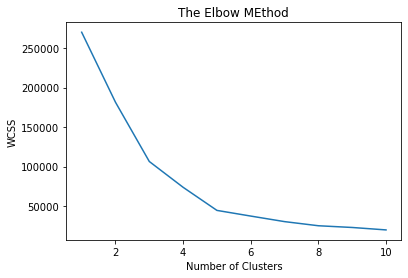

In [9]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow MEthod')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [11]:
df_y = pd.DataFrame(y_kmeans)
df_y[0].unique()

array([4, 0, 1, 2, 3], dtype=int32)

In [12]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [13]:
df['cluster']=df_y
df

<ipython-input-13-366053a4d34b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=df_y


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,3
197,126,74,2
198,137,18,3


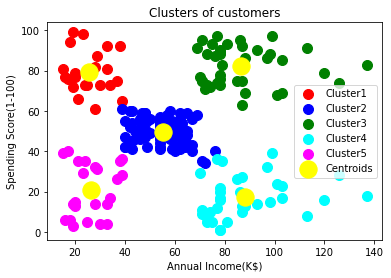

In [14]:
#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

### Silhouette Scoring for K-Means

In [15]:
from sklearn.metrics import silhouette_samples,silhouette_score
lst_sl_avg=[]
for i in range(2,10):
    cluster_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluster_model.fit_predict(X)
    sil_avg=silhouette_score(X,cluster_labels)
    lst_sl_avg.append(sil_avg)

In [16]:
lst_sl_avg

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5367558067779578,
 0.5281944387251989,
 0.4563394686110682,
 0.4595491760122954]

## Heirarchial Clustering

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dataset=pd.read_csv('Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
X=dataset.iloc[:,[3,4]].values   #or [:,3:]
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

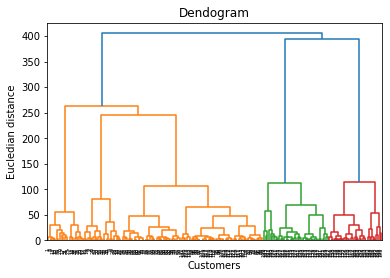

In [20]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian distance')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [23]:
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

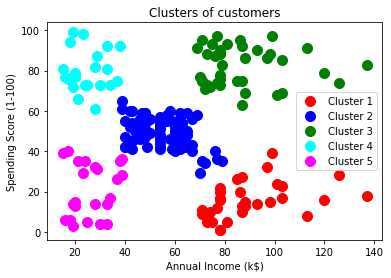

In [24]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Silhouette Scoring for Heirarchial

In [25]:
from sklearn.metrics import silhouette_samples,silhouette_score
lst_sl_avg=[]
for i in range(2,10):
    cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    cluster_labels=cluster_model.fit_predict(X)
    sil_avg=silhouette_score(X,cluster_labels)
    lst_sl_avg.append(sil_avg)

In [26]:
lst_sl_avg

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897,
 0.5380208285578872,
 0.519904611908887,
 0.4326286245782246,
 0.43892545672004507]

## Silhouette Score  --  Validating the no. of clusters

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [44]:
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10,10),shuffle=True)

In [45]:
X

array([[-2.62250546e+00, -1.56873132e+00],
       [-9.92870037e-01, -2.95893288e+00],
       [-7.12336128e+00, -3.30052030e+00],
       [-6.67132160e+00, -3.17110873e+00],
       [-2.66238510e+00, -4.81206511e+00],
       [ 7.39439701e+00, -7.95860000e+00],
       [-1.30338666e+00, -1.00039841e+00],
       [-1.18543273e+00, -1.93168853e+00],
       [-2.20567370e+00, -4.45755774e+00],
       [-7.97597321e+00, -1.79299689e+00],
       [-9.29362787e-01, -8.95380522e-01],
       [-4.78499864e+00, -4.67790212e+00],
       [-6.77046810e+00, -3.16783870e+00],
       [-5.78928981e+00, -3.94650979e+00],
       [ 7.27018868e+00, -7.77631728e+00],
       [-2.28711437e+00, -1.23292949e+00],
       [-9.58770834e+00, -2.28987260e+00],
       [-1.39171786e+00, -5.29202781e-01],
       [-9.21200768e+00, -3.18751681e+00],
       [ 5.34347924e+00, -7.36584017e+00],
       [-2.34828604e+00, -4.63344364e+00],
       [-2.60171876e+00, -2.49979077e+00],
       [-3.67729835e+00, -2.73929509e+00],
       [ 5.

In [46]:
y

array([0, 0, 1, 1, 2, 3, 0, 0, 2, 1, 0, 2, 1, 1, 3, 0, 1, 0, 1, 3, 2, 2,
       2, 3, 2, 3, 3, 2, 0, 0, 1, 2, 1, 2, 2, 3, 3, 1, 3, 3, 1, 1, 3, 2,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0,
       3, 3, 2, 2, 1, 3, 1, 2, 1, 1, 0, 2, 3, 3, 1, 1, 1, 1, 0, 3, 2, 1,
       0, 1, 3, 1, 3, 2, 2, 1, 2, 0, 3, 3, 3, 1, 1, 3, 2, 3, 2, 3, 1, 0,
       2, 0, 3, 0, 3, 3, 1, 1, 3, 1, 3, 0, 1, 0, 3, 2, 0, 2, 2, 3, 0, 1,
       1, 2, 3, 2, 2, 0, 3, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 3, 0, 0, 3, 3,
       2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 3, 3, 3, 2, 1, 0, 2, 0, 1, 0,
       0, 1, 2, 3, 3, 2, 0, 1, 1, 1, 0, 0, 1, 3, 1, 0, 1, 0, 3, 2, 0, 3,
       1, 1, 1, 1, 1, 3, 2, 3, 3, 3, 0, 3, 1, 3, 2, 0, 1, 2, 1, 0, 3, 3,
       2, 1, 3, 0, 2, 2, 2, 2, 2, 1, 3, 3, 0, 2, 0, 0, 3, 3, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 2, 3, 2, 2, 0, 0, 2, 1, 3, 1, 2, 0, 3, 0, 3, 1,
       1, 1, 1, 1, 0, 3, 2, 3, 0, 3, 3, 2, 1, 3, 0, 3, 1, 1, 1, 3, 0, 0,
       3, 3, 1, 2, 2, 3, 1, 0, 1, 3, 0, 1, 1, 0, 1,

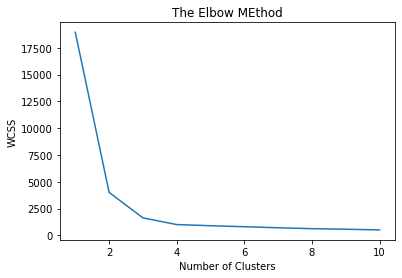

In [47]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow MEthod')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [48]:
cluster_model=KMeans(n_clusters=4,init='k-means++')
cluster_labels=cluster_model.fit_predict(X)
print(cluster_labels)

[3 3 0 0 2 1 3 3 2 0 3 2 0 0 1 3 0 3 0 1 2 3 2 1 2 1 1 2 3 2 0 2 0 2 2 1 1
 0 1 1 0 0 1 2 0 3 3 3 3 0 3 3 3 2 3 2 3 1 3 2 3 3 3 1 3 3 1 1 2 2 0 1 0 2
 0 0 3 2 1 1 0 0 0 0 3 1 2 0 3 0 1 0 1 2 2 0 2 3 1 1 1 0 0 1 3 1 2 1 0 3 2
 3 1 3 1 1 0 0 1 0 1 3 0 3 1 2 3 2 2 1 3 2 0 2 1 2 2 3 1 3 0 2 2 3 3 3 3 2
 0 1 3 3 1 1 2 0 2 0 3 2 3 3 0 0 0 3 1 1 1 2 0 3 2 3 0 3 3 0 2 1 1 2 2 0 0
 0 3 3 0 1 0 3 0 3 1 2 3 1 0 0 0 0 0 1 2 1 1 1 3 1 0 1 2 3 0 2 0 3 1 1 2 0
 1 3 2 2 2 2 2 0 1 1 3 3 2 3 1 1 3 3 2 0 2 2 0 3 3 0 2 1 2 2 3 3 2 0 1 0 2
 3 1 3 1 0 0 0 0 0 3 1 2 1 3 1 1 2 0 1 3 1 0 0 0 1 3 3 1 1 0 2 2 1 0 3 0 1
 3 0 0 3 0 0 1 0 2 0 1 1 2 0 1 0 3 2 3 0 1 2 2 3 1 0 0 3 0 1 2 1 2 2 0 0 0
 2 3 2 3 1 0 2 0 0 2 0 3 0 2 1 3 1 1 3 2 1 1 0 2 2 2 2 3 2 0 1 2 3 1 2 2 3
 3 0 0 3 1 3 1 3 0 1 3 2 1 2 3 1 1 2 2 2 2 1 2 0 1 2 3 1 2 2 3 1 3 2 1 1 0
 3 0 0 1 0 3 2 0 2 3 0 3 2 1 1 1 0 1 1 0 1 2 2 0 2 3 2 2 0 1 3 0 2 0 3 2 1
 3 3 3 3 0 1 2 2 3 2 2 0 3 2 3 3 0 0 0 0 2 2 2 3 2 1 3 1 2 2 1 2 2 2 3 2 1
 1 1 0 2 0 0 2 3 3 1 1 1 

In [49]:
lst_sl_avg=[]
for i in range(2,6):
    cluster_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluster_model.fit_predict(X)#via X data is being fetched
    sil_avg=silhouette_score(X,cluster_labels)
    lst_sl_avg.append(sil_avg)
lst_sl_avg


[0.7284217201735357,
 0.6324196097547602,
 0.5952785633730744,
 0.5305537497431151]

## Full Detail of Silhouette Score with Diagram

In [50]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)

0.5305537497431151


In [51]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)

print(len(sample_silhouette_values))
print(sample_silhouette_values)

500
[ 0.3734399   0.0932586   0.60115685  0.52304688  0.51823004  0.87749315
  0.40125324  0.16035801  0.34618786  0.74565749  0.47261836  0.48435701
  0.549129    0.03494552  0.87544501  0.12138093  0.67538454  0.42997227
  0.66217651  0.73382067  0.4267151   0.55274264  0.26417229  0.65985369
  0.5575665   0.82078141  0.87579493  0.56350634  0.45074422  0.29865706
  0.74843104  0.41689722  0.57715397  0.18844186  0.33036732  0.86695323
  0.81843087  0.73315699  0.84367792  0.87025674  0.669374    0.75409635
  0.85642506  0.24835436  0.66108526  0.26430527  0.36840273  0.11784234
  0.18888671  0.71063711  0.4674661   0.36396955  0.10719368  0.09858671
  0.28134995  0.0121889   0.51850693  0.81391164  0.31148516  0.05911672
  0.45776846  0.43946978 -0.00176772  0.80935116  0.45479698  0.15063961
  0.79350217  0.84006871  0.05152341  0.46575621  0.62451563  0.77474214
  0.73534244  0.60755238  0.65301486  0.57188607  0.39570803  0.60833976
  0.83412945  0.8610733   0.65196824  0.6149131

For n_clusters = 2 The average silhouette_score is : 0.7284217201735357
For n_clusters = 3 The average silhouette_score is : 0.6324196097547602
For n_clusters = 4 The average silhouette_score is : 0.5952785633730744
For n_clusters = 5 The average silhouette_score is : 0.5277143635978503
For n_clusters = 6 The average silhouette_score is : 0.45865013492653056


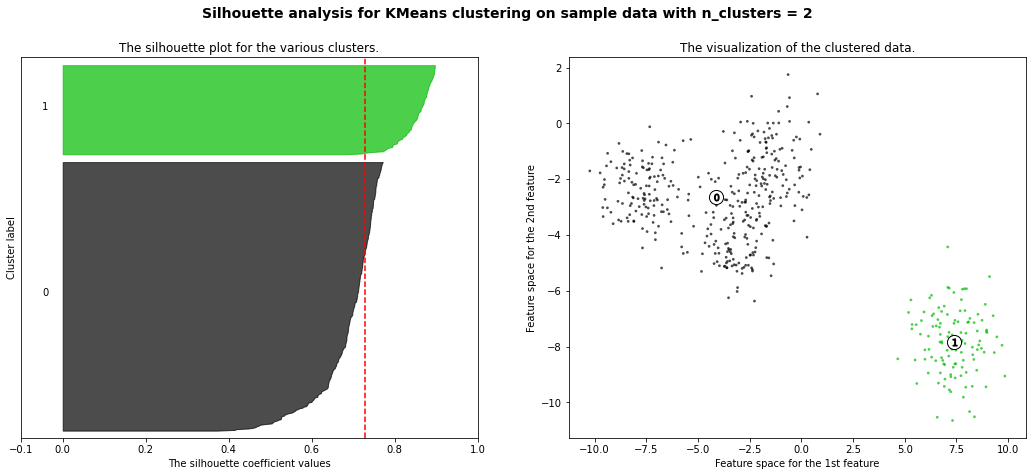

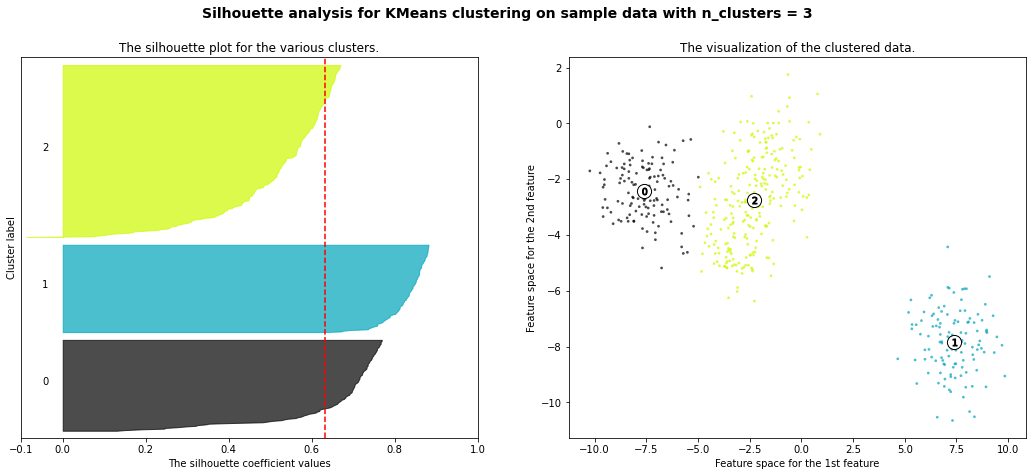

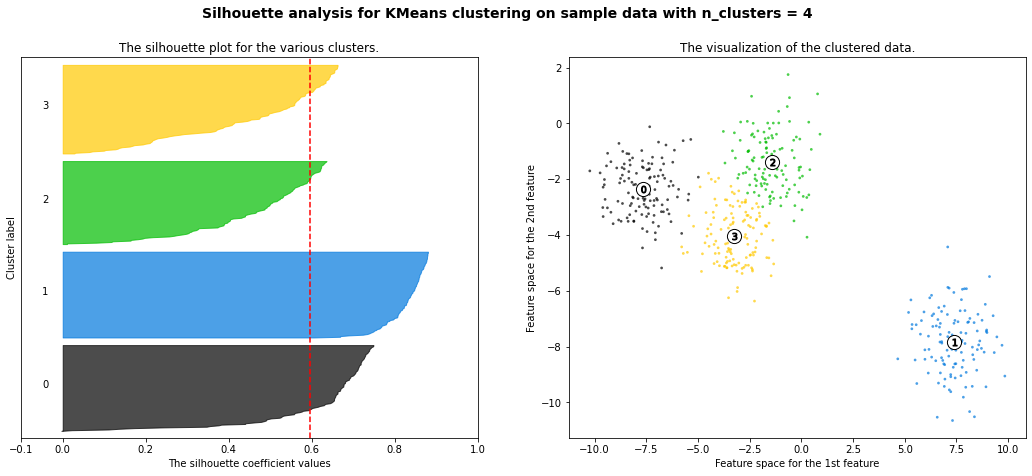

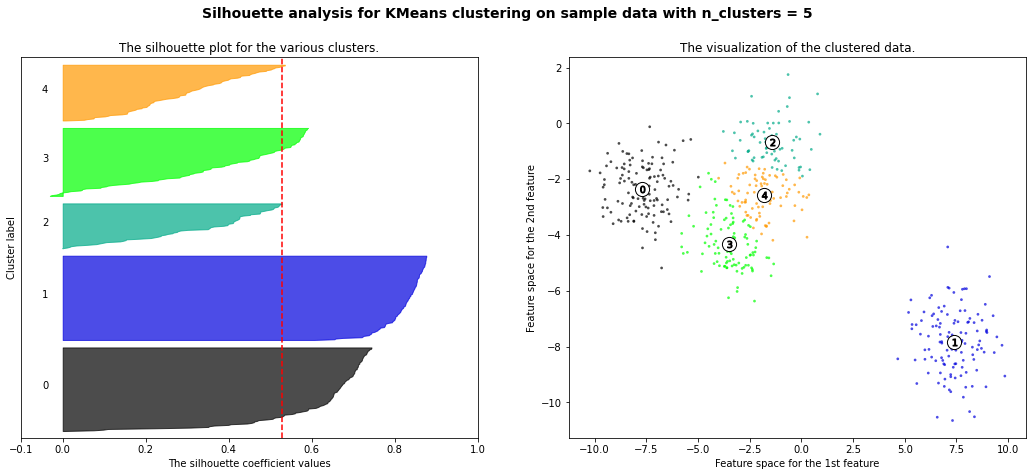

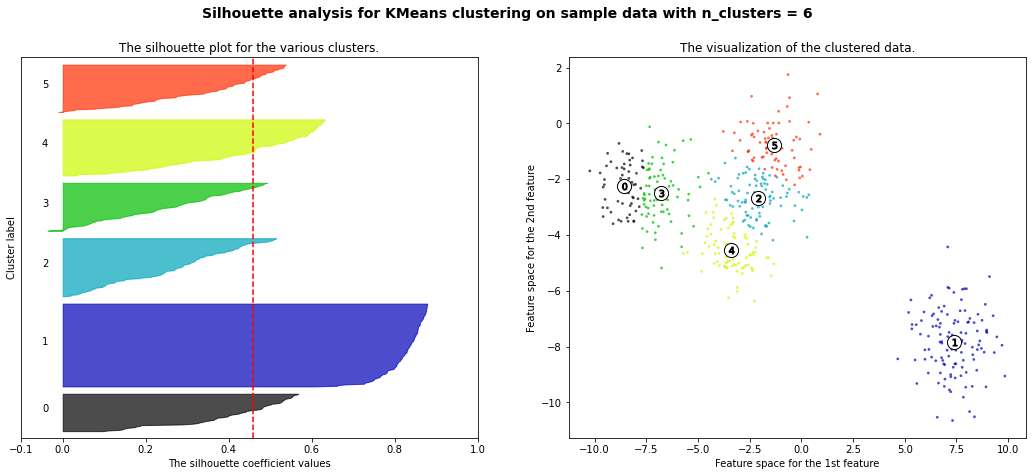

In [52]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
lst_sl_avg=[]
for i in range(2,6):
    cluster_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluster_model.fit_predict(X)
    sil_avg=silhouette_score(X,cluster_labels)
    lst_sl_avg.append(sil_avg)
    
lst_sl_avg

